## Confidence Intervals

So far we have focused on **point estimates** of our model parameters: in other words we have focused on methods which take data as input and return single number estimates for each parameter of our model.  

It is often nice to have an **interval estimate** instead of just a point estimate.  We would like some idea of the range of values the parameter is likely to take (under the assumptions of the model).

One common sort of interval estimator is a **confidence interval**.  We first give a definition:

**Definition**:  Let $X$ be a random sample from a probability distribution with parameter $\theta$. A **confidence interval estimator** with confidence level $\alpha$ for the parameter $\theta$ is a pair of bounds $L(X)$, $U(X)$ so that 

$$
\operatorname{P}\left(L(X) < \theta < U(X)\right) = 1 - \alpha
$$

A single realization of these bounds is called a **confidence interval**.

Confidence Intervals are (notoriously) subject to *many* common misinterpretations (see the paper ["Robust misinterpretation of confidence intervals"](https://www.ejwagenmakers.com/inpress/HoekstraEtAlPBR.pdf) by Hoekstra, Morey, Rouder, and Wagenmakers for example).  It is important for us to understand what confidence intervals are and what they are not.

**Example 1**: "$z$ interval for the mean"

Let $X_1, X_2, X_3, ..., X_n$ be i.i.d. samples from $\mathcal{N}(\mu, \sigma^2)$ where the variance $\sigma^2$ is known.  We know that the MLE point estimate for the mean is

$$
\bar{X} = \frac{X_1 + X_2 + \dots + X_n}{n}
$$

Note that $\bar{X}$ is also normally distributed with mean $\mu$ but with variance $\frac{\sigma^2}{n}$.  Letting $Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ we see that $Z$ is $\mathcal{N}(0,1)$ distributed.  Thus

$$
\begin{align*}
1- \alpha 
&= P(-z_{\alpha/2} < Z < z_{\alpha/2})\\
&= P(-z_{\alpha/2} < \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} < z_{\alpha/2})\\
&= P(\bar{X}-z_{\alpha/2}\frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}} )\\
\end{align*}
$$

so we have obtained a $1-\alpha$ confidence interval.

**Correct interpretation**

* We need to *assume* that samples are being drawn from a normal distribution with known variance and unknown mean.
* We need to *assume* that samples are independent.
* Given these assumptions if we use the confidence interval estimator described above *repeatedly* we should see that, in the long run, $1-\alpha$ of the confidence intervals generated actually enclose the true parameter.

**Common misunderstandings**

* It is *not* true that there is a $1 - \alpha$ probability that $\mu$ is in the confidence interval. $\mu$ is a fixed parameter which is either in the interval or not.
* It is *not* true that if we repeat the experiment then our point estimate $\bar{X}$ will lie in the confidence interval $(1-\alpha)$ of the time.

Let's simulate this using synthetic data

In [3]:
import numpy as np
from scipy.stats import norm, t

In [4]:
variance = 2
mean = 5
number_of_experiments = 10000
sample_size = 10
alpha = 0.05

radius = norm.ppf(1-alpha/2)*np.sqrt(variance)/np.sqrt(sample_size)

mean_in_interval = 0.0
for i in range(number_of_experiments):
    X = np.random.normal(loc = mean, scale = np.sqrt(variance), size = sample_size)
    # norm.ppf is the inverse of the cdf of the standard normal distribution
    L = X.mean() - radius
    U = X.mean() + radius
    if L < mean and mean < U:
        mean_in_interval += 1.0

# As number_of_experiments gets larger, the following ration should approach 0.95
mean_in_interval/number_of_experiments

0.9499

It might also be helpful to visualize what is going on for a smaller number of experiments:

In [5]:
variance = 2
mean = 5
number_of_experiments = 100
sample_size = 10
alpha = 0.05

radius = norm.ppf(1-alpha/2)*np.sqrt(variance)/np.sqrt(sample_size)

# vectorized version of the code for generating the confidence intervals
X = np.random.normal(loc = mean, scale = np.sqrt(variance), size = (number_of_experiments, sample_size))
L = X.mean(axis = 1) - radius
U = X.mean(axis = 1) + radius 

In [6]:
import matplotlib.pyplot as plt

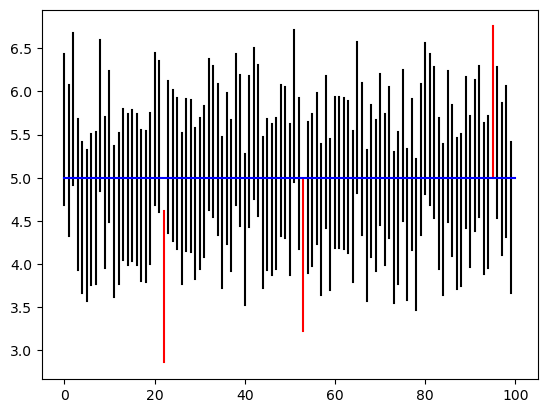

In [7]:
for i in range(number_of_experiments):
    if L[i] > mean or mean > U[i]:  
        plt.plot([i,i], [L[i],U[i]], 'r')
    else:
        plt.plot([i,i], [L[i],U[i]], 'k')

plt.plot([0,number_of_experiments], [mean, mean], 'b')
plt.show()

Here the true mean is $5$ which is depicted by a horizontal blue line.  We generated $100$ confidence intervals based on different random samples.  The confidence intervals which contain the mean are shown in black, while those which do not contain the mean are shown in red.

**Example 2**:  "t-interval for the mean"

The confidence interval derived above assumes that the population variance is known.  More frequently we will not have access to the population variance, and this parameter must also be estimated from the sample.  In math hour we show that $T = \frac{\bar{X} - \mu}{S/\sqrt{n}}$ (where $S$ is the sample variance) follows a t-distribution with $n-1$ degrees of freedom.

We obtain a very similar confidence interval in this case, namely

$$
\bar{X} \pm t_{n-1, \alpha/2} \frac{s}{\sqrt{n}}
$$

This is a little bit wider than the $z$ interval if the variance were known to be $s$, reflecting a bit more uncertainty resulting from estimating the variance.

Note:  The pdf of the $t$ distribution with $\nu$ degrees of freedom is given by

$$
f_\nu(t)\ =\ \frac{\ \Gamma\!\left(\frac{\ \nu+1\ }{ 2 }\right)\ }{\ \sqrt{\pi\ \nu\ }\; \Gamma\!\left(\frac{\nu}{2}\right)} \; \left(\ 1 + \frac{~ t^2\ }{ \nu }\ \right)^{-(\nu+1)/2}
$$

as $\nu \to \infty$, these approach the pdf of the standard normal distribution.  Each $t$-distribution looks similar to a normal distribution but with "fatter tails".

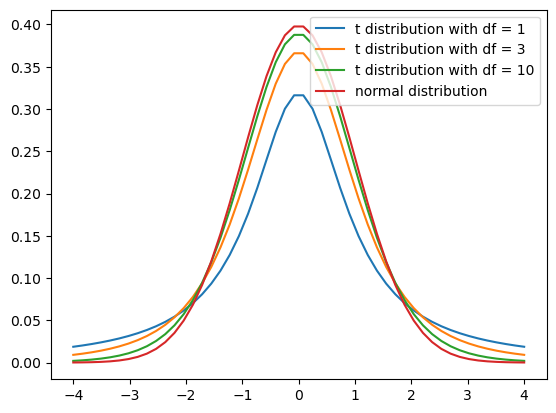

In [14]:
xs = np.linspace(-4, 4)
for df in [1, 3, 10]:
    plt.plot(xs, t.pdf(xs, df), label = f't distribution with df = {df}')

plt.plot(xs, norm.pdf(xs), label = 'normal distribution')
plt.legend()
plt.show()

## Correspondence between Hypothesis tests and Confidence Regions

For each $\theta_0 \in \Theta$ fix a hypothesis testing procedure of $H_0 : \theta = \theta_0$ of size $\alpha$ whose acceptance region (in sample space) is $A(\theta_0)$.  Then, for each $\textbf{x}$ in the sample space, we can define a confidence set 

$$
C(\textbf{x}) = \{\theta_0: x \in A(\theta_0)\}
$$

Then the random set $C(\textbf{X})$ is a $1 - \alpha$ confidence set.  

In words, if we have a family of hypothesis tests $H_0 : \theta = \theta_0$ for each $\theta_0 \in \Theta$ then we form the confidence set for a sample $\textbf{x}$ by asking "what are all of the values of $\theta_0$ for which I would accept the null hypothesis given this sample $\textbf{x}$?"

This is called "inversion" of a hypothesis test or confidence region.

So hypothesis tests and confidence regions can be seen as approaching the same question from dual perspectives:

* A hypothesis test fixes the parameters and asks which samples could "plausibly" arise from those parameters.
* A confidence set fixes the sample and asks which parameters could "plausibly" have generated that sample.

